In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
 
f = lambda x: np.exp(2*x)
a = 0 # evaluate at a
 
fp = derivative(f, a, dx = 0.001, n = 1) # nth derivative
fpp = derivative(f, a, dx = 0.001, n = 2)
fppp = derivative(f, a, dx = 0.001, n = 3, order = 5) # use 5 points to calculate
 
print(fp, fpp, fppp)

2.000001333333612 4.000001333492875 8.00000798939493


-exp(-x)*sin(x) + exp(-x)*cos(x)
-0.05631477560126881


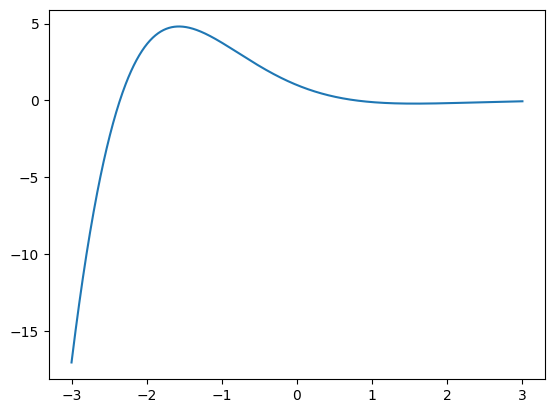

-0.05631477560126881


In [2]:
import sympy as sym
import matplotlib.pyplot as plt
 
x = sym.Symbol('x')
f = sym.exp(-x) * sym.sin(x)
fp = f.diff(x) # the first derivative
fpp = f.diff(x, 2) # the second derivative 
print(fp) # print out to see the symbolic function
 
# substitution; need to convert to float if necessary
print(float(fp.subs(x, 3))) # evaluate f'(3)
# evaluate symbolic function at more than one points
feval = sym.lambdify(x, fp) # transfer from symbolic function to lambda function
a = np.linspace(-3, 3, 1000)
 
plt.plot(a, feval(a)) # use symbolic computation to draw a figure
plt.show()
print(feval(3)) # compare with the previous one


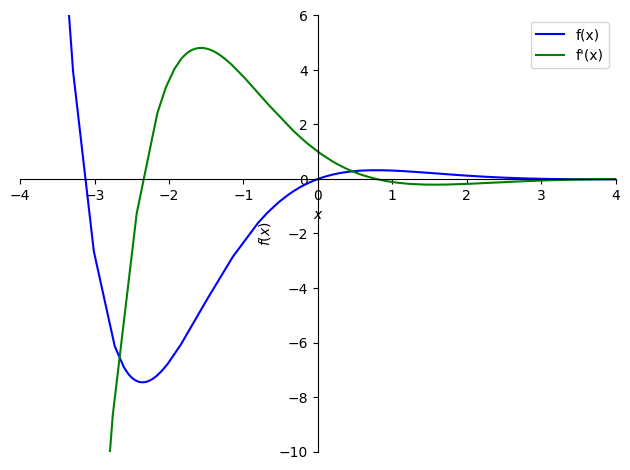

In [3]:
import sympy as sym
from sympy.plotting import plot
 
x = sym.Symbol('x')
f = sym.exp(-x) * sym.sin(x)
fp = f.diff(x)
# draw two separate figures
# f1 = plot(f, xlim = [-4, 4], ylim = [-10, 5])
# f2 = plot(fp, xlim = [-4, 4], ylim = [-10, 5])
# draw two lines in a single figure
f1 = plot(f, xlim = [-4, 4], ylim = [-10, 6], \
    line_color = 'b', label = 'f(x)', show = False)
f2 = plot(fp, xlim = [-4, 4], ylim = [-10, 6], \
    line_color = 'g', label = "f'(x)", show = False)
f1.append(f2[0]) # append f2 to f1
f1.legend = True
f1.show()

The integration is 0.3103


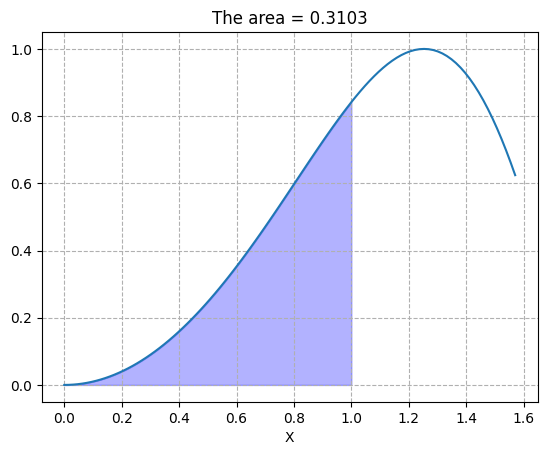

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral
 
# define anonymous function
f = lambda x : np.sin(x**2)
lb, ub = 0, 1
result = integral.quad(f, lb, ub)
print("The integration is {:.4f}".format(result[0]))
 
# draw the function line -------------------
x = np.linspace(0, np.pi/2, 100)
y = f(x)
fig, ax = plt.subplots(1, 1) 
ax.plot(x, y)
# draw the area ----------------------------
x = np.linspace(lb, ub, 100)
y = f(x)
# fill color between y and 0
ax.fill_between(x, y, 0, alpha=0.3, color='b')
ax.set_xlabel('X')
ax.set_title("The area = {:.4f}".format(result[0]))
plt.grid(True, linestyle='--', which='major')
plt.show()

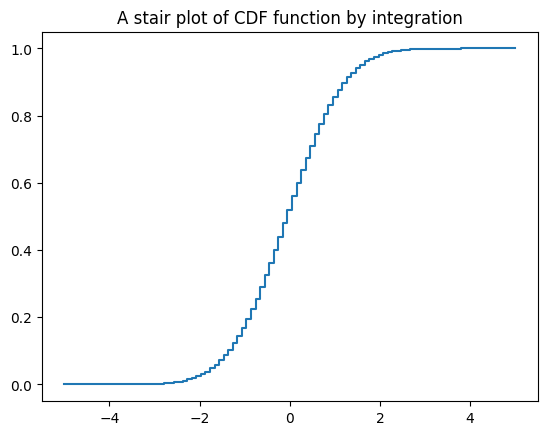

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral
 
n = 100
f = lambda x : np.exp(-x**2/2) / np.sqrt(2*np.pi)
xlim = [-5, 5]
x = np.linspace(xlim[0], xlim[1], n)
 
def cdf(x):
    return integral.quad(f, -np.inf, x)[0]
 
vec_F = np.vectorize(cdf) # define a vectorized function
F = vec_F(x) # evalaute cdf for all x
plt.plot(x, F, drawstyle='steps-pre') # stairs plot
plt.title('A stair plot of CDF function by integration')
plt.show()

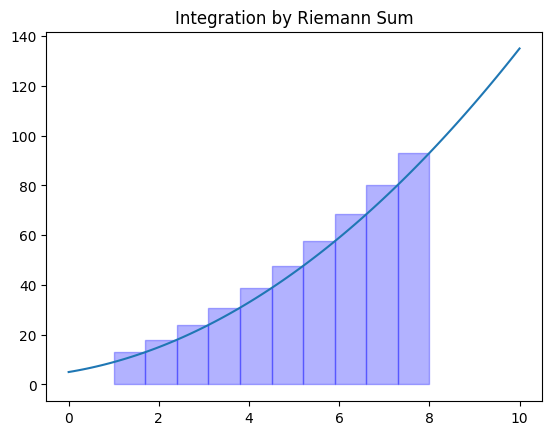

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral
 
N = 10 # how many intervals
n = 100
lb, ub = 1, 8
f = lambda x : x**2 + 3*x +5
xlim = [0, 10]
x = np.linspace(xlim[0], xlim[1], n)
plt.plot(x, f(x))
 
rec = np.linspace(lb, ub, N+1)
for i in range(N) :
    plt.fill_between([rec[i], rec[i+1]], 
        [f(rec[i+1]), f(rec[i+1])], 0, alpha=0.3, color='b')
    # plt.pause(0.5) # animation not work in Jupyter notbook 
plt.title('Integration by Riemann Sum')    
plt.show()  

In [7]:
import sympy as sym
 
x = sym.Symbol('x')
f = sym.sqrt(x**2 + 4*x + 12)
# f = sym.sin(x) # check this simple function
# F = sym.integrate(f, x)
F = f.integrate(x) # indefinite integral
print(F)
# Definite integral with a symbolic result
I = sym.integrate(f, (x, -2, 6)) 
 
print("The definite integral is {:.4f}".format(float(I)))


(x/2 + 1)*sqrt(x**2 + 4*x + 12) + 4*asinh(sqrt(2)*(x + 2)/4)
The definite integral is 40.9921
